Libraries

In [272]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Import data

### Explore Data

In [216]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight. 
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [217]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Estimate

In [218]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Visualization

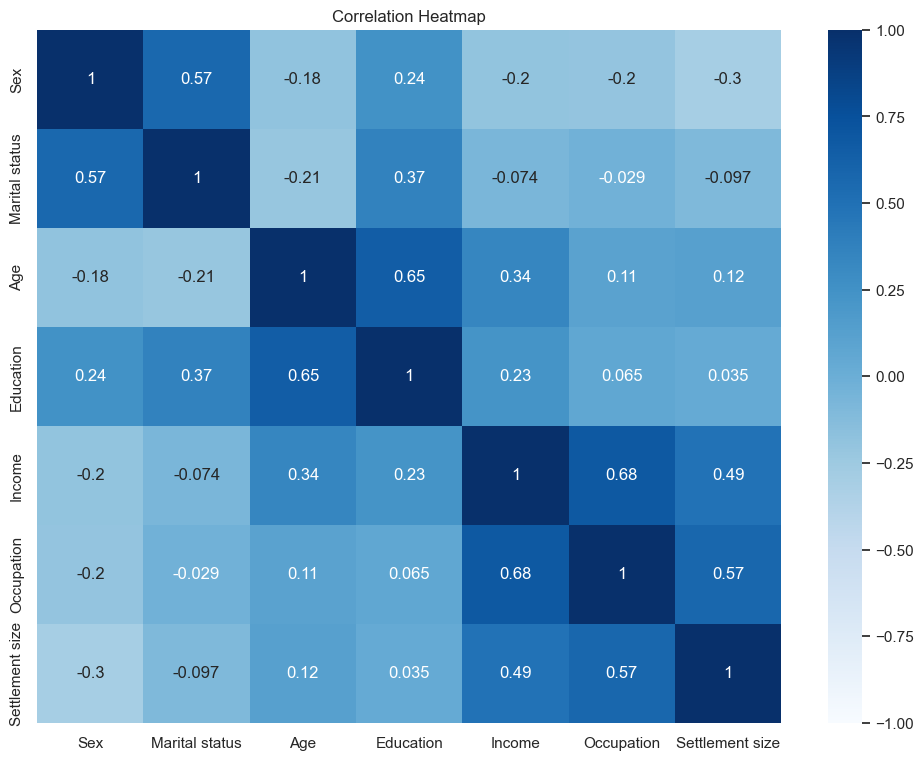

In [219]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'Blues',
                vmin = -1,
                vmax = 1)

plt.title('Correlation Heatmap')
plt.show;

Text(0.5, 1.0, 'Scatter Plot of Raw Data')

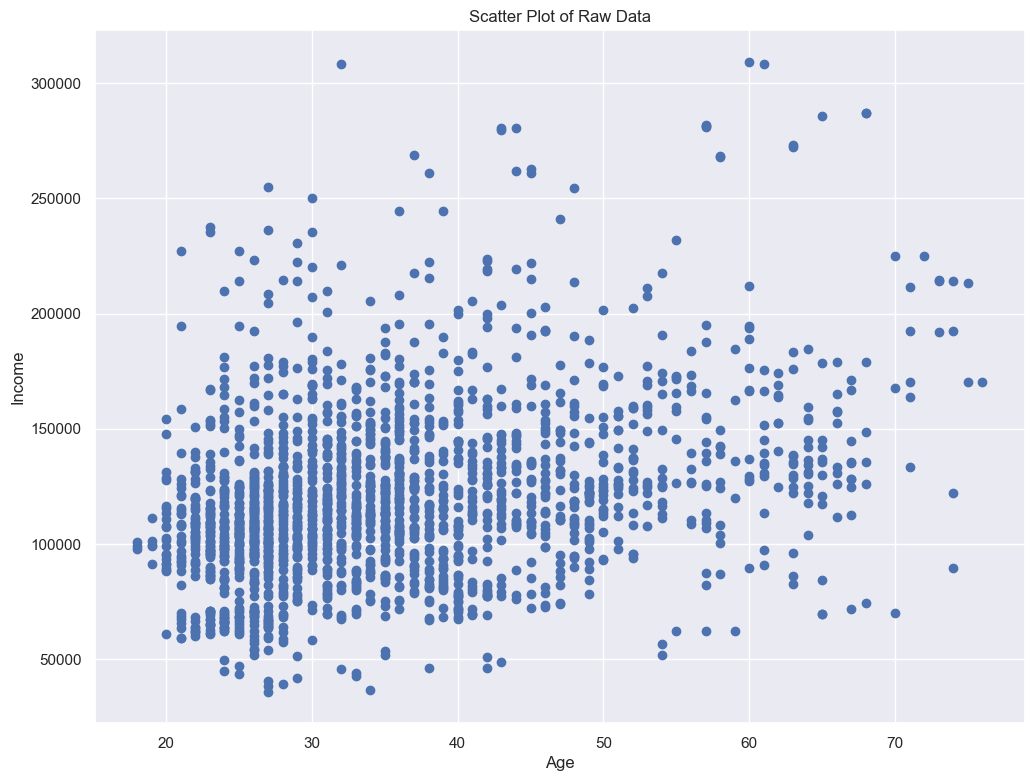

In [220]:
# scatter plot acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Raw Data')

Standardize Data

In [221]:
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df_segmentation)

In [222]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

Hierarchicak Clustering

In [223]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 

heir_clus = linkage(segmentation_std, method = 'ward')

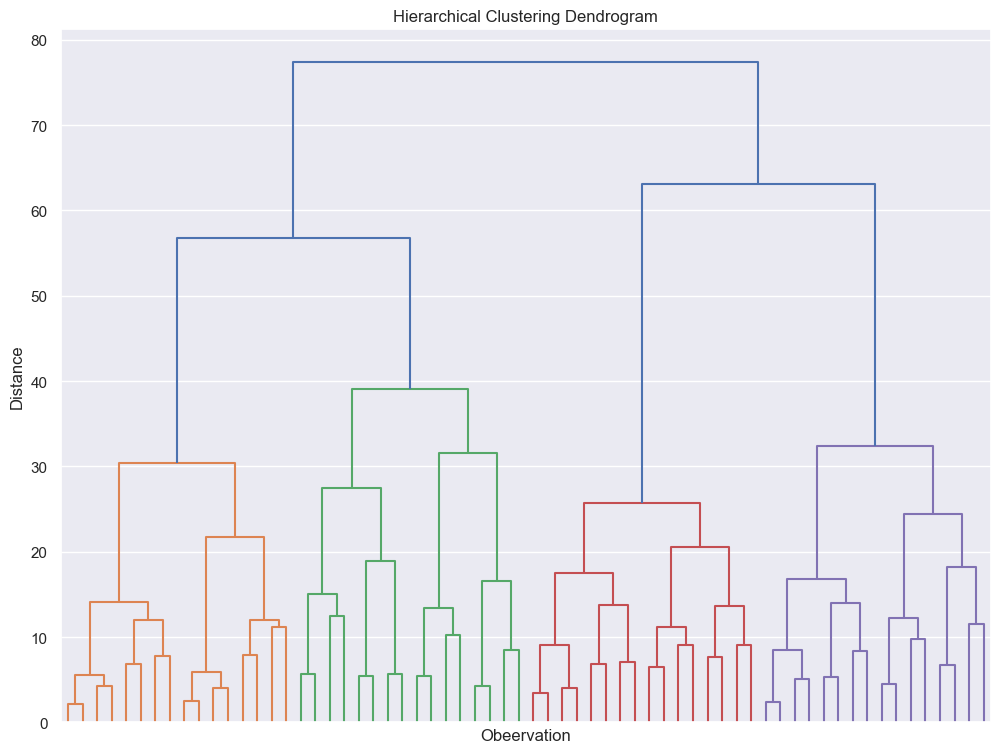

In [224]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Obeervation")
plt.ylabel('Distance')
dendrogram(heir_clus, 
            show_leaf_counts= False,
            truncate_mode='level',
            p = 5,
            no_labels= True
            )
            
plt.show()
## we have 4 clusters

# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.

K- meanclustering

In [225]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

In [226]:

wcss

[14000.000000000002,
 10514.558847734455,
 8630.913216898229,
 7169.870822465846,
 6403.134167928613,
 5830.956302961155,
 5378.854705323013,
 5005.13460976662,
 4724.527779695852,
 4295.656622405145]

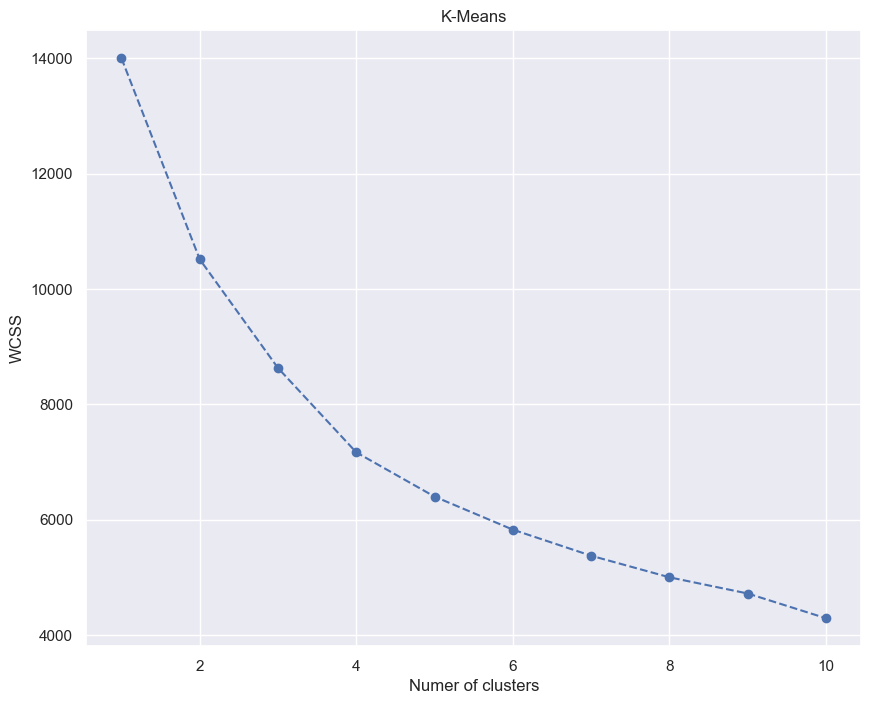

In [227]:
 #Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.title('K-Means')
plt.show()

#### the number of clusters from k-means and the number of cluster from Hierarchical Clustering Dendrogram is same so we can state that the data consist of 4 clusters

In [228]:
#run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)

In [229]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Result

In [230]:
df_segm_kmeans = df_segmentation.copy()

In [231]:
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [232]:
# Calculate mean values for the clusters

df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


Notice form the cluster

cluster 0:      compose of man and woman almost equally as state in sex column, almost 70% in relationship and the average age,education,income is the highest among all segments

cluster 1:      in this segments consis of male in the proportion of 2/3 and almost all is single with the marital status very close to zero with the average age of 36 and the income is lowest and most of them live in small town (settlement size close to zero)

cluster 2:      most of them are in the relationship with the lowest average age amoung all segments and other parameter are average compare to the others segments

cluster 3:      most of them are men and less than 20 percent of whome are in the relationship and have low education value but high income and occupatioin live in big or middle size cities

In [233]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Age']].groupby(['Segment K-means']).count()

# note in the group by statement we need to include a second argument(column), in order to count each row in the table, in this case use Age column

In [234]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [235]:
df_segm_analysis.reset_index()

,Segment K-means,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
0,0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [236]:
df_segm_analysis.rename({0: 'well-off',
                        1: 'few opputunities',
                        2: "standard",
                        3: 'career focus'}).reset_index()

,Segment K-means,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
0,well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,few opputunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,career focus,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


Vizualize the data

In [237]:
# Add the segment labels to our table
df_segm_kmeans ['Lables'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                    1: 'few opputunities',
                                                                    2: "standard",
                                                                    3: 'career focus'})

In [238]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Lables
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,1,few opputunities
100000004,0,0,45,1,171565,1,1,3,career focus
100000005,0,0,53,1,149031,1,1,3,career focus
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,few opputunities
100001997,1,1,27,1,117744,1,0,2,standard
100001998,0,0,31,0,86400,0,0,1,few opputunities


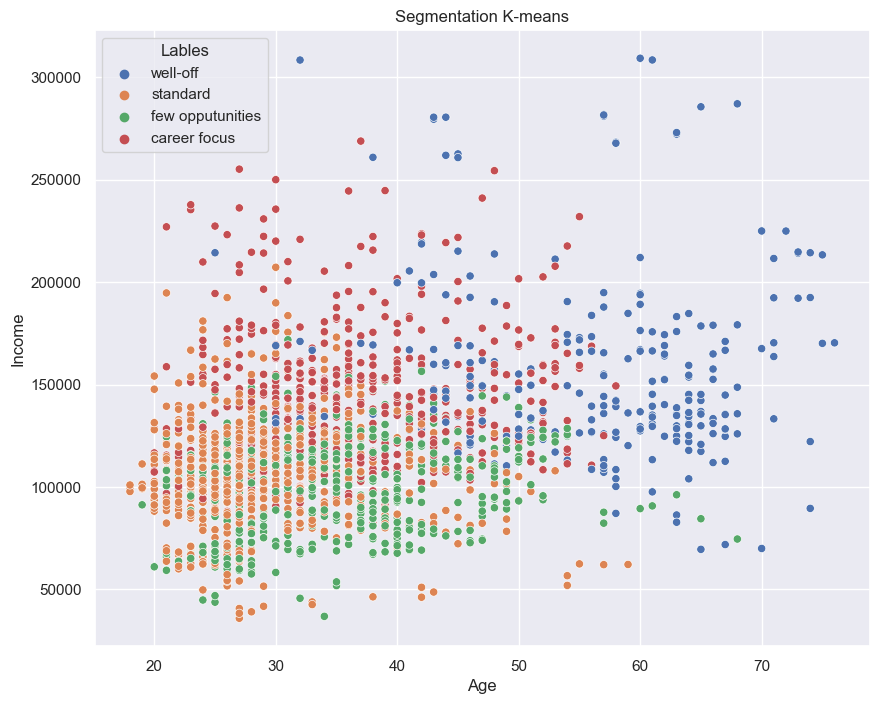

In [239]:
#plot the results from the K-means algorithm. 
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_segm_kmeans['Age'], y= df_segm_kmeans['Income'], hue = df_segm_kmeans['Lables'])
plt.title('Segmentation K-means')
plt.show()

PCA

In [240]:
from sklearn.decomposition import PCA

In [241]:
pca = PCA()
# Employ PCA to find a subset of components, which explain the variance in the data.


In [242]:
pca.fit(segmentation_std)

PCA()

In [243]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cummulative Explained Varience')

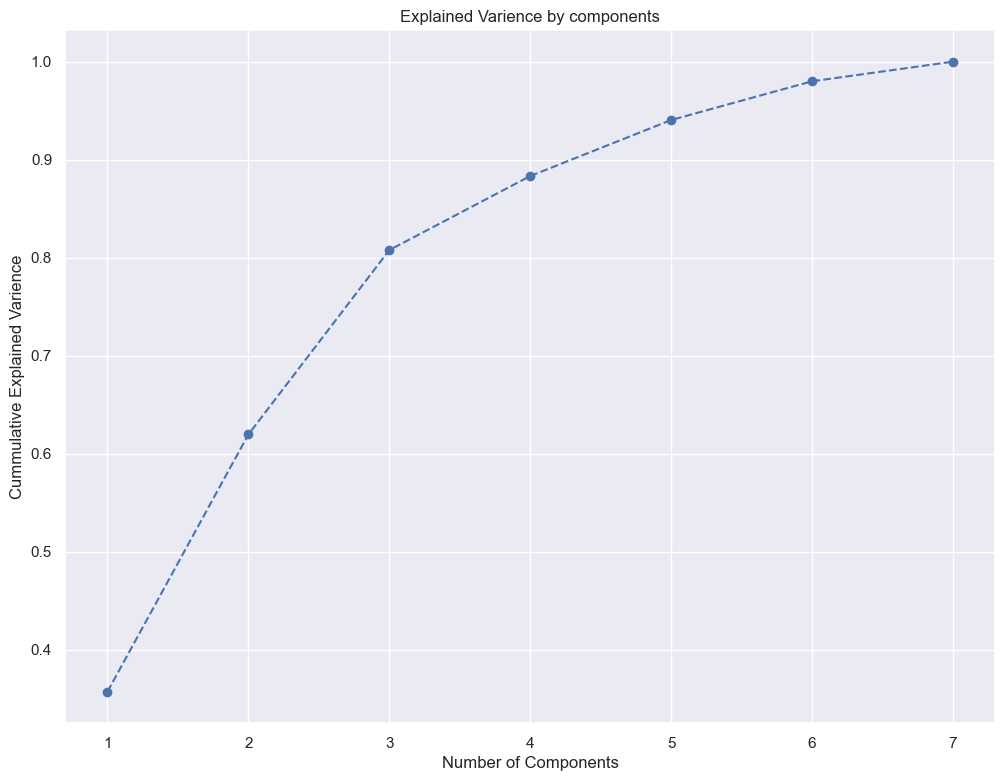

In [244]:
# Plot the cumulative variance explained by total number of components
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Varience by components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Varience')

##### if we choose 2 componient we can get oly 60% of information, choose 4 will preserved around 90% of the information (keep above 70% is all good)

In [245]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.

pca = PCA(n_components = 3)

In [246]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

### PCA result

In [247]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [248]:
df_pca_comp = pd.DataFrame(data =pca.components_, 
                           columns = df_segmentation.columns.values, 
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


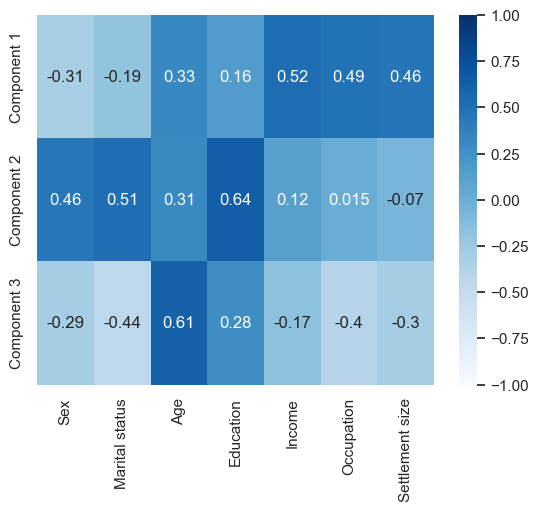

In [249]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'Blues',
            annot= True);

In [250]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [251]:
score_pca = pca.transform(segmentation_std)

#### K-means clustering with PCA

In [252]:
# We fit K means using the transformed data from the PCA.

wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

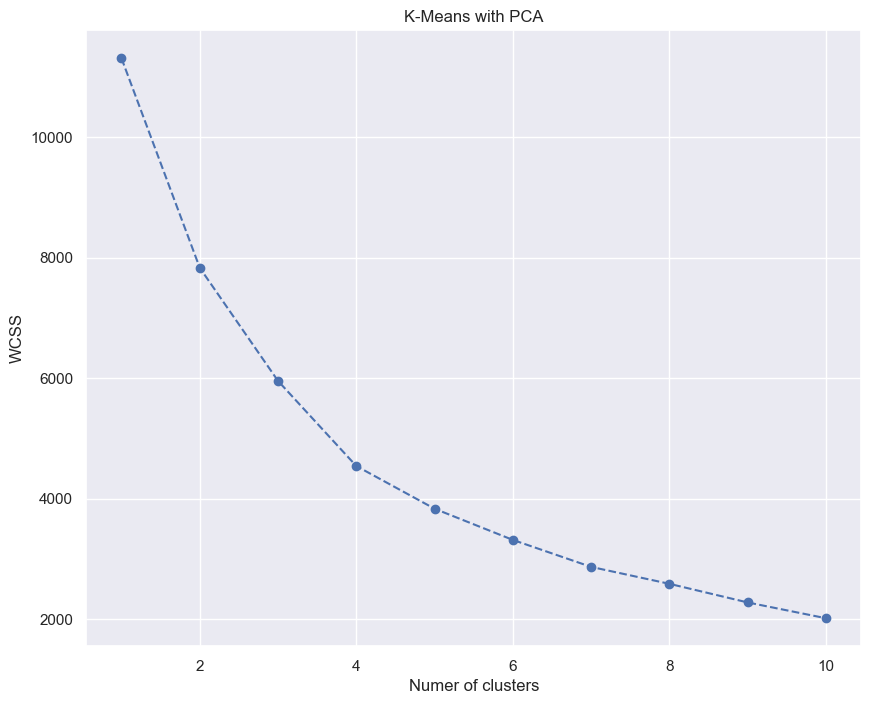

In [253]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA')
plt.show()

# notice that in this case 4 is the best option of number of clusters 

In [254]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters=4, init = 'k-means++', random_state=42)

In [255]:
 # fit our data with the k-means pca model
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

#### K means cluster with pca result

create a new data frame with the original features and add the PCA scores and assigned clusters.

add contains the pca k-means clustering labels in the last column.

In [256]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(score_pca)], axis =1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment_K_means_PCA'] = kmeans_pca.labels_

In [257]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment_K_means_PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [258]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(["Segment_K_means_PCA"]).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment_K_means_PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [259]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment_K_means_PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


segment index 0 (standard) :   low on the first componient (related to career)

segment index 1 (career focus) :   high in carrer and low on education lifestyle 

segment index 2 (fewer opp) :   low on both career and education but high on component 3 (experience) 

segment index 3 (well off segement) :   high on both career and education lifestyle  

In [260]:
# see how many ppl belong on each cluster

df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0: 'standard',1: 'career focus',2:'fewer opputunities', 3: 'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment_K_means_PCA,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
career focus,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
fewer opputunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [261]:
df_1 = df_segm_pca_kmeans_freq.copy()
df_1 = df_1.reset_index()
df_1

,Segment_K_means_PCA,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
0,standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,career focus,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,fewer opputunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [262]:
df_1x = df_segm_pca_kmeans[['Sex','Segment_K_means_PCA']].groupby(['Segment_K_means_PCA']).count().reset_index().rename(columns={'Sex' : 'N'})
df_1x = df_1x[['N']]
df_1x


,N
0,692
1,583
2,460
3,265


In [263]:
df_segm_pca_kmeans[['Sex','Segment_K_means_PCA']].groupby(['Segment_K_means_PCA']).count()/2000

,Sex
Segment_K_means_PCA,
0,0.3460
1,0.2915
2,0.2300
3,0.1325


In [264]:
df_1x1 = df_segm_pca_kmeans[['Sex','Segment_K_means_PCA']].groupby(['Segment_K_means_PCA']).count()/2000
df_1x1 = df_1x1.reset_index()
df_1x1 = df_1x1.rename(columns={'Sex':'Prop Obs'})[['Prop Obs']]
df_1x1 

,Prop Obs
0,0.3460
1,0.2915
2,0.2300
3,0.1325


#### Calculate the size of each cluster and its proportion to the entire data set.


In [265]:
df_segm_pca_kmeans_freq_st = pd.concat([df_1,df_1x, df_1x1], axis=1)
df_segm_pca_kmeans_freq_st['%'] = df_segm_pca_kmeans_freq_st[['Prop Obs']]*100
df_segm_pca_kmeans_freq_st

,Segment_K_means_PCA,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N,Prop Obs,%
0,standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460,34.60
1,career focus,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915,29.15
2,fewer opputunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300,23.00
3,well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325,13.25


In [266]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment_K_means_PCA'].map({0: 'standard',1: 'career focus',2:'fewer opputunities', 3: 'well-off'})

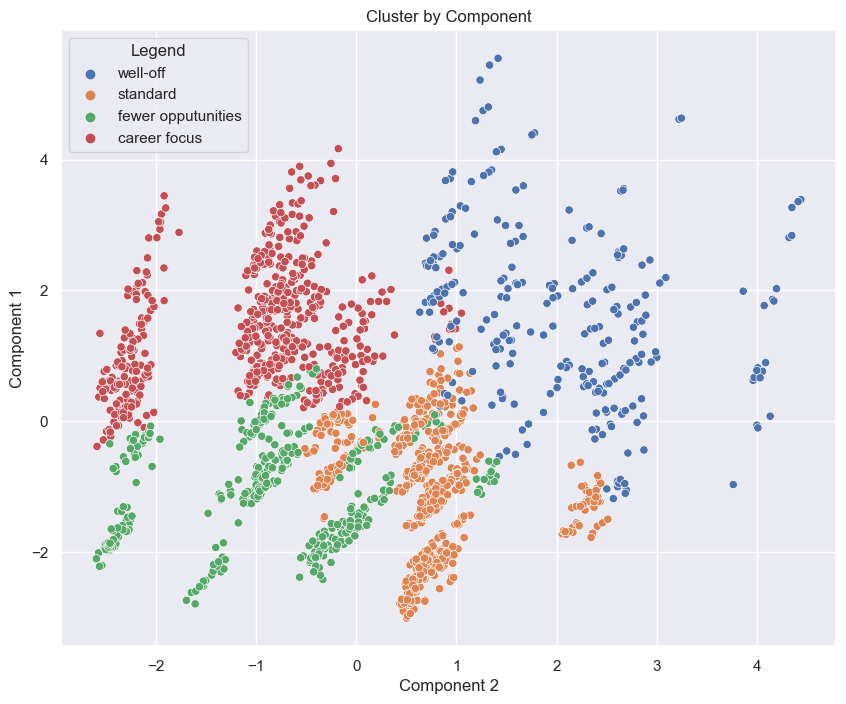

In [267]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x = x_axis,y = y_axis, hue = df_segm_pca_kmeans['Legend'])
plt.title('Cluster by Component')
plt.show()

In [268]:
# turn py obj to string
import pickle  

Export Data

In [269]:
pickle.dump(scalar, open('scalar.pickle', 'wb'))

In [270]:
pickle.dump(pca, open('pca.pickle','wb'))

In [271]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))